In [58]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

domain_names = {
    'github': 'GitHub',
    'arxiv': 'arXiv',
    'c4': 'C4',
    'book': 'Books',
    'wikipedia': 'Wikipedia',
}

def load_data(input_path):
    with open(input_path, 'rb') as f:
        data = pickle.load(f)
    return data

def load_data_for_model(model):
    df = []
    for domain in domain_names.keys():
        input_path = f"routing_output/{model}/expert_counts/{domain}.pkl"
        layer0, layer7, layer15 = load_data(input_path)
        counters = {
            0: layer0,
            7: layer7,
            15: layer15,
        }
        for i in [0, 7, 15]:
            total_count = sum(counters[i].values())
            for j, v in counters[i].items():
                df.append({
                    'Domain': domain_names[domain],
                    'Layer': i,
                    'Expert': j,
                    'Proportion': v / total_count * 100,
                })
    df = pd.DataFrame(df)
    return df

<Figure size 1280x880 with 0 Axes>

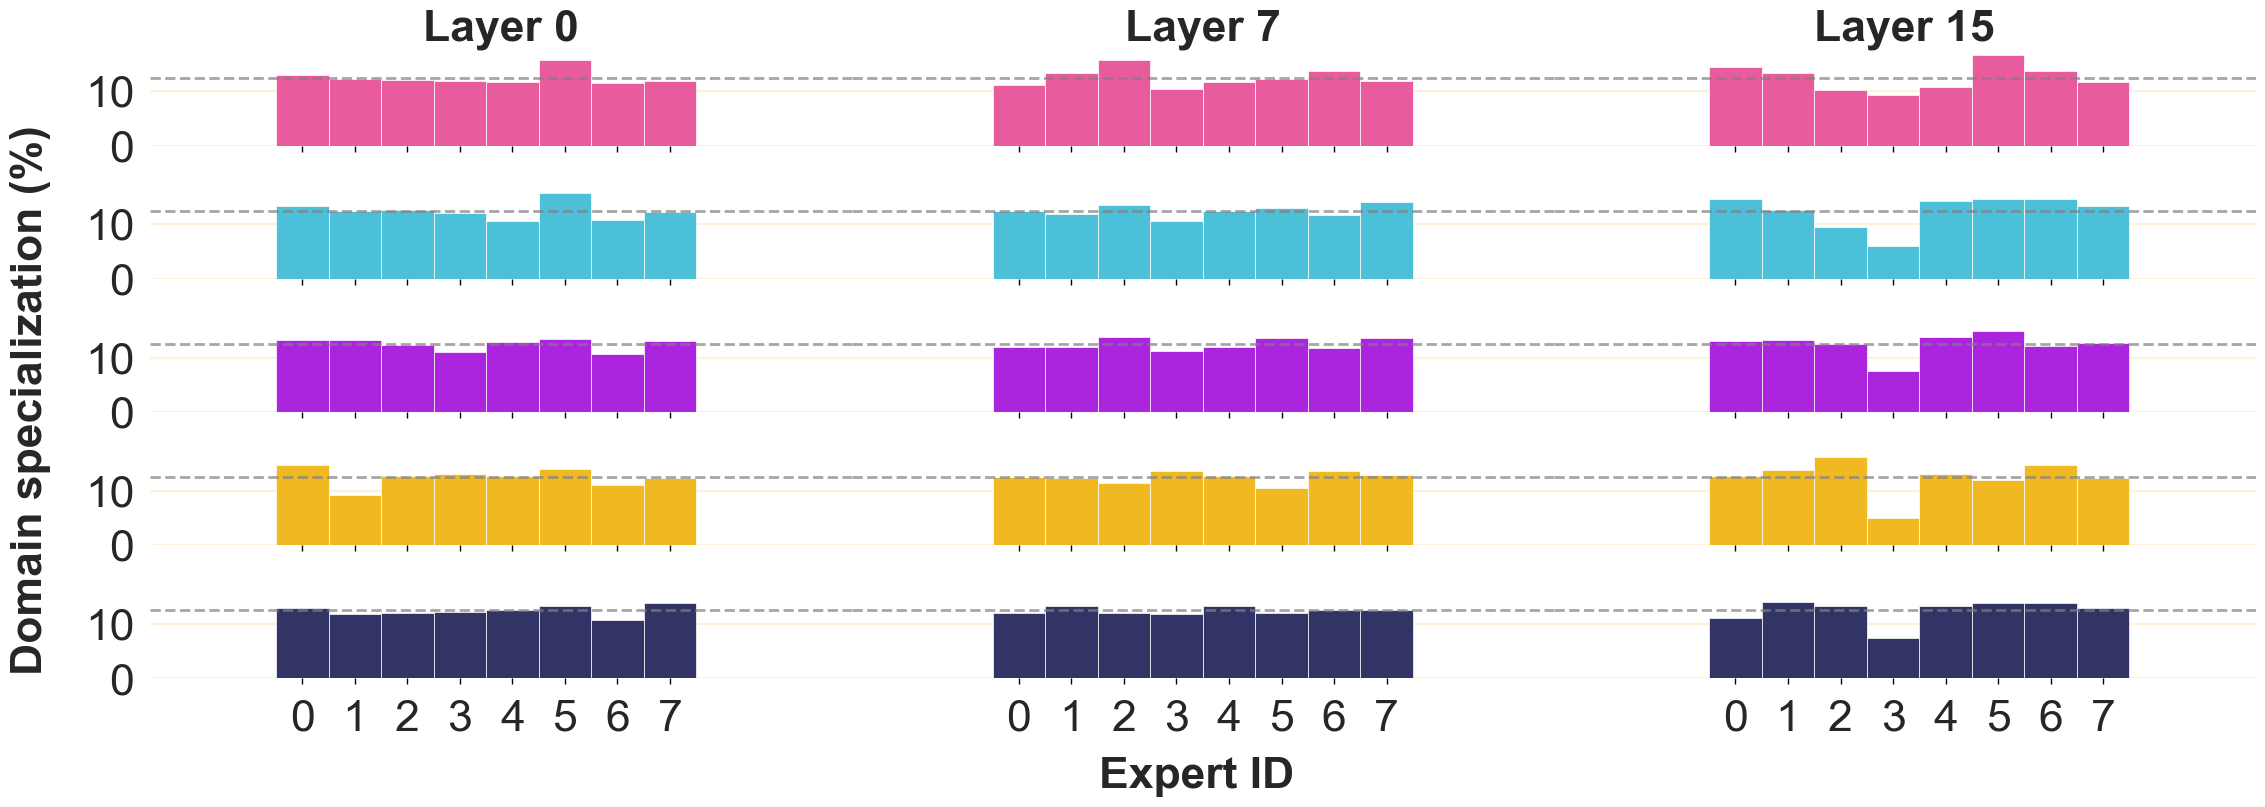

In [59]:
df = load_data_for_model('mistral')
num_experts = df.Expert.nunique()

plt.style.use('seaborn-v0_8-poster')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("white")

sns.despine()

COLORS = {
    'GitHub': '#F0539B',
    'arXiv': '#43C5E0',
    'Wikipedia': '#B11BE8',
    'Books': '#FDBE15',
    'C4': '#2E3168',
}

FONTSIZE=32
LABEL_FREQ = 1
TICK_FREQ = 1
PADDING = num_experts * 0.6
PADDING2 = num_experts * 0.07

g = sns.catplot(data=df, x='Expert', y='Proportion', row='Domain', hue="Domain", col="Layer", kind='bar',
                row_order=COLORS.keys(), hue_order=COLORS.keys(), palette=COLORS.values(),
                aspect=4.5, height=1.7, gap=0.0, linewidth=0.5, width=1.0, margin_titles=True, sharex=False, saturation=0.9)


labels = sum(([i]+[""]*(LABEL_FREQ - 1) for i in range(0, num_experts, LABEL_FREQ)), [])
g.set_xticklabels(labels)

for rows in g.axes:
    for ax in rows:
        ax.axhline(y=1/num_experts*100, color='grey', linestyle='--' , linewidth=2, alpha=0.7)
        ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='#FFE5B4')
        ax.tick_params(axis='x', which='major', length=4, width=1, color='black', direction='out', reset=True, bottom=True, top=False, labelsize=FONTSIZE)
        ax.tick_params(axis='y', which='major', labelsize=FONTSIZE)

        ticks = ax.get_xticks()
        ticks = [t for t in ticks if t % TICK_FREQ == 0]
        ax.set_xticks(ticks)

    # Create a bit of padding
    ax = rows[0]
    ax.set_xlim(ax.get_xlim()[0]-PADDING/2, ax.get_xlim()[1]+PADDING/2 + PADDING2)
    ax = rows[1]
    ax.set_xlim(ax.get_xlim()[0]-PADDING/2 - PADDING2/2, ax.get_xlim()[1]+PADDING/2 + PADDING2/2)
    ax = rows[2]
    ax.set_xlim(ax.get_xlim()[0]-PADDING/2 - PADDING2, ax.get_xlim()[1]+PADDING/2)

# Remove ticks for all but the bottom row
for rows in g.axes[:-1]:
    for ax in rows:
        ax.set_xticklabels([])

g.set_ylabels("")
g.set_xlabels("")
plt.subplots_adjust(hspace=0.4, wspace=0.0)
g.figure.supylabel('Domain specialization (%)', fontsize=FONTSIZE, fontweight='bold', x=-0.02)
g.figure.supxlabel('Expert ID', fontsize=FONTSIZE, fontweight='bold', y=0.033, x=0.46)

g.set_titles(row_template="", col_template="Layer {col_name}", size=FONTSIZE, fontweight="bold")
g.legend.set_title("")
g.legend.set_visible(False)

plt.savefig('routing_mixtral_v2.pdf', bbox_inches='tight')
plt.savefig('routing_mixtral_v2.jpg', bbox_inches='tight')

/scratch/gpfs/DANQIC/awettig/miniconda3/envs/scaling/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1280x880 with 0 Axes>

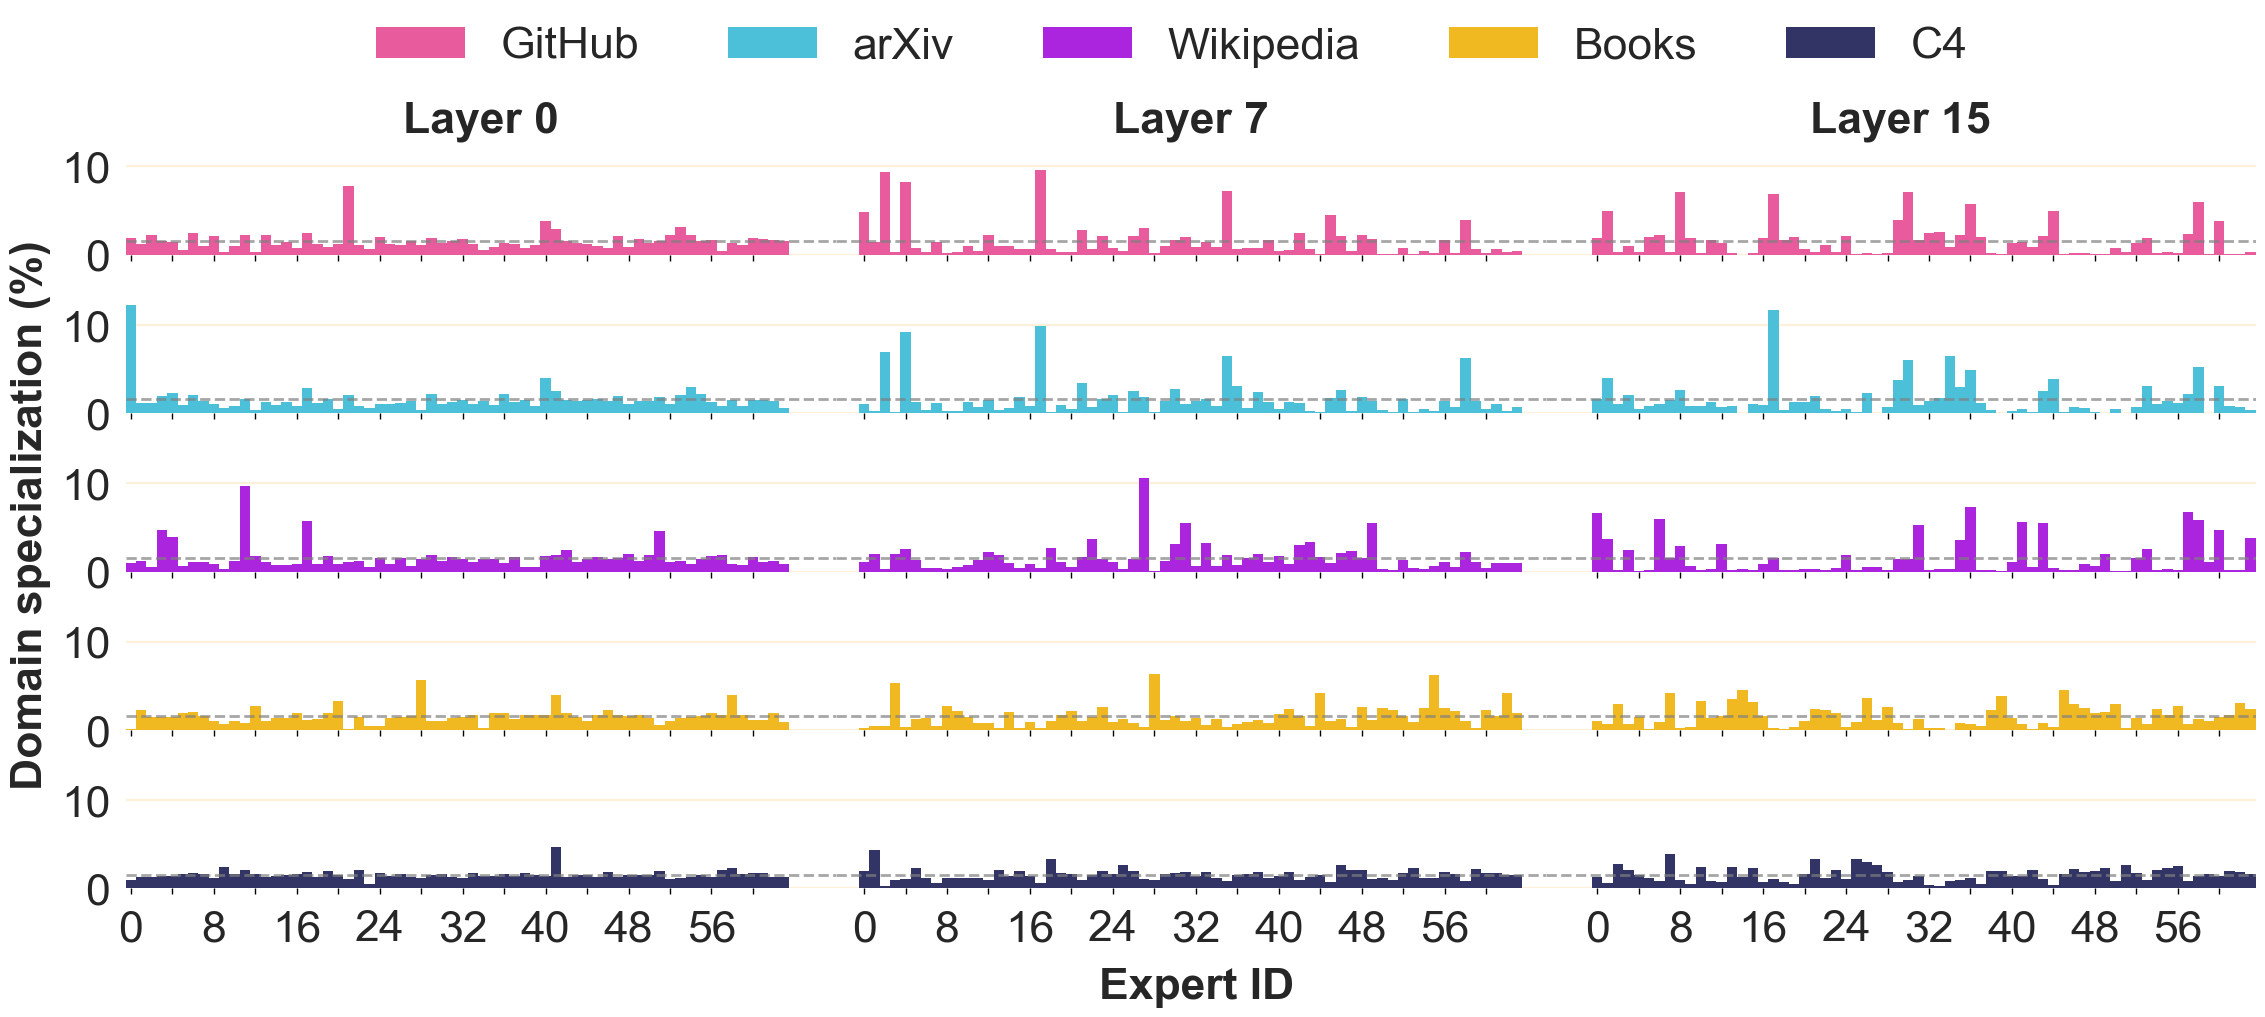

In [60]:
df = load_data_for_model('olmoe')
num_experts = df.Expert.nunique()

plt.style.use('seaborn-v0_8-poster')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style("white")

sns.despine()

COLORS = {
    'GitHub': '#F0539B',
    'arXiv': '#43C5E0',
    'Wikipedia': '#B11BE8',
    'Books': '#FDBE15',
    'C4': '#2E3168',
}

FONTSIZE=32
LABEL_FREQ = 8
TICK_FREQ = 4
PADDING = num_experts * 0.07

g = sns.catplot(data=df, x='Expert', y='Proportion', row='Domain', hue="Domain", col="Layer", kind='bar',
                row_order=COLORS.keys(), hue_order=COLORS.keys(), palette=COLORS.values(),
                aspect=4.5, height=1.7, gap=0.0, linewidth=0.0, width=1.0, margin_titles=True, sharex=False, saturation=0.9)


labels = sum(([i]+[""]*(LABEL_FREQ - 1) for i in range(0, num_experts, LABEL_FREQ)), [])
g.set_xticklabels(labels)

for rows in g.axes:
    for ax in rows:
        ax.axhline(y=1/num_experts*100, color='grey', linestyle='--' , linewidth=2, alpha=0.7)
        ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='#FFE5B4')
        ax.tick_params(axis='x', which='major', length=4, width=1, color='black', direction='out', reset=True, bottom=True, top=False, labelsize=FONTSIZE)
        ax.tick_params(axis='y', which='major', labelsize=FONTSIZE)

        ticks = ax.get_xticks()
        ticks = [t for t in ticks if t % TICK_FREQ == 0]
        ax.set_xticks(ticks)

    # Create a bit of padding
    ax = rows[0]
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]+PADDING)
    ax = rows[1]
    ax.set_xlim(ax.get_xlim()[0]-PADDING/2, ax.get_xlim()[1]+PADDING/2)
    ax = rows[2]
    ax.set_xlim(ax.get_xlim()[0]-PADDING, ax.get_xlim()[1])

# Remove ticks for all but the bottom row
for rows in g.axes[:-1]:
    for ax in rows:
        ax.set_xticklabels([])

g.set_ylabels("")
g.set_xlabels("")
plt.subplots_adjust(hspace=0.4, wspace=0.0)
g.figure.supylabel('Domain specialization (%)', fontsize=FONTSIZE, fontweight='bold', x=-0.02)
g.figure.supxlabel('Expert ID', fontsize=FONTSIZE, fontweight='bold', y=-0.08, x=0.46)

g.set_titles(row_template="", col_template="Layer {col_name}", size=FONTSIZE, fontweight="bold")
g.legend.set_title("")
sns.move_legend(g, "upper center", bbox_to_anchor=(0.45, 1.12), ncol=5, fontsize=FONTSIZE)

plt.savefig('routing_olmoe_v2.pdf', bbox_inches='tight')
plt.savefig('routing_olmoe_v2.jpg', bbox_inches='tight')